<DIV ALIGN=CENTER>

# Introduction to Text Mining, Part II
## Professor Robert J. Brunner
  
</DIV>  
-----
-----


## Introduction

In this IPython Notebook, we continue the text mining work to include more advanced concepts.

We first repopulate this notebook with data and info.

In [1]:
# load dataset
from sklearn.datasets import fetch_20newsgroups
train = fetch_20newsgroups(subset='train', shuffle=True, random_state=23)
test = fetch_20newsgroups(subset='test', shuffle=True, random_state=23)

### Bag of Words


In [2]:
from sklearn.feature_extraction.text import CountVectorizer

# Verify attributes

cv = CountVectorizer(stop_words = 'english', ngram_range=(1,2), max_features=100000)



In [3]:
train_counts = cv.fit_transform(train['data'])

test_data = cv.transform(test['data'])

### SGD Classifier


In [5]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier().fit(train_counts, train['target'])
predicted = clf.predict(test_data)

np.mean(predicted == test['target'])   


0.76128518321826877

In [6]:
from sklearn import metrics

print(metrics.classification_report(test['target'], predicted,
    target_names = test['target_names']))

                          precision    recall  f1-score   support

             alt.atheism       0.75      0.74      0.74       319
           comp.graphics       0.68      0.69      0.69       389
 comp.os.ms-windows.misc       0.66      0.68      0.67       394
comp.sys.ibm.pc.hardware       0.59      0.66      0.62       392
   comp.sys.mac.hardware       0.69      0.79      0.74       385
          comp.windows.x       0.81      0.64      0.71       395
            misc.forsale       0.73      0.82      0.77       390
               rec.autos       0.71      0.82      0.76       396
         rec.motorcycles       0.81      0.91      0.86       398
      rec.sport.baseball       0.88      0.81      0.84       397
        rec.sport.hockey       0.87      0.91      0.89       399
               sci.crypt       0.88      0.83      0.85       396
         sci.electronics       0.67      0.66      0.67       393
                 sci.med       0.88      0.67      0.76       396
         

In [4]:
%matplotlib inline

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", context='paper', font='monospace')

# Convenience function to plot confusion matrix

# This method produces a colored heatmap that displays the relationship
# between predicted and actual types from a machine leanring method.

def confusion(test, predict, title):

    f, ax = plt.subplots(figsize=(12, 8))

    # Make a 2D histogram from the test and result arrays
    pts, xe, ye = np.histogram2d(test, predict, bins=20)

    # For simplicity we create a new DataFrame
    pd_pts = pd.DataFrame(pts.astype(int))
    
    # Display heatmap and add decorations
    hm = sns.heatmap(pd_pts, annot=True, fmt="d")
    hm.axes.set_title(title)
    
    return None

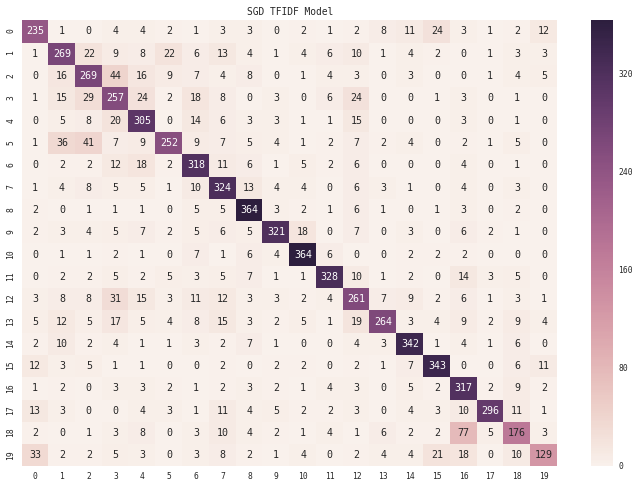

In [7]:
confusion(test['target'], predicted, 'SGD TFIDF Model')

### SVM

In [8]:
# Next lets try Linear SVM
from sklearn import svm

# Lets build our model and train it all at once

clf = svm.LinearSVC(C=1000).fit(train_counts, train['target'])

predicted = clf.predict(test_data)

In [9]:
print("SVM prediction accuracy = {0:5.1f}%".format(100.0 * clf.score(test_data, test['target'])))

# Now grab the predictions
#result = clf.predict(d_test)

#print("SVM prediction accuracy = {0:5.1f}%".format(100.0 * clf.score(d_test, l_test)))

SVM prediction accuracy =  80.0%


In [10]:
print(metrics.classification_report(test['target'], predicted,
    target_names = test['target_names']))

                          precision    recall  f1-score   support

             alt.atheism       0.79      0.74      0.76       319
           comp.graphics       0.68      0.74      0.71       389
 comp.os.ms-windows.misc       0.72      0.69      0.71       394
comp.sys.ibm.pc.hardware       0.63      0.67      0.65       392
   comp.sys.mac.hardware       0.74      0.78      0.76       385
          comp.windows.x       0.81      0.72      0.76       395
            misc.forsale       0.75      0.86      0.80       390
               rec.autos       0.85      0.83      0.84       396
         rec.motorcycles       0.91      0.92      0.92       398
      rec.sport.baseball       0.86      0.88      0.87       397
        rec.sport.hockey       0.91      0.94      0.93       399
               sci.crypt       0.93      0.91      0.92       396
         sci.electronics       0.69      0.72      0.70       393
                 sci.med       0.84      0.79      0.81       396
         

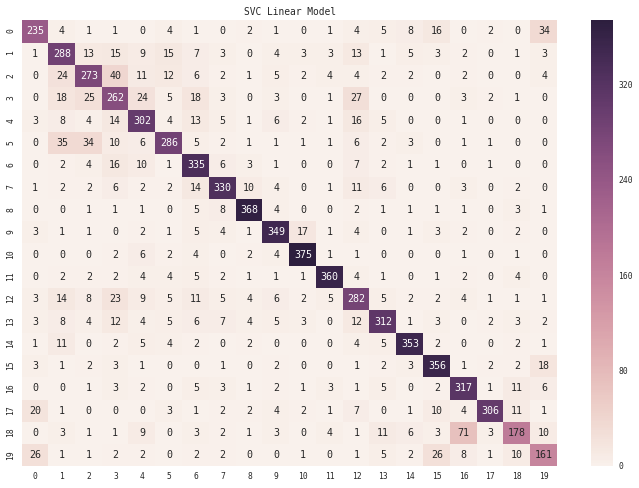

In [11]:
confusion(test['target'], predicted, 'SVC Linear Model')

### Logistic Regression


In [12]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(train_counts, train['target'])

predicted = clf.predict(test_data)
print("SVM prediction accuracy = {0:5.1f}%".format(100.0 * clf.score(test_data, test['target'])))



SVM prediction accuracy =  81.8%


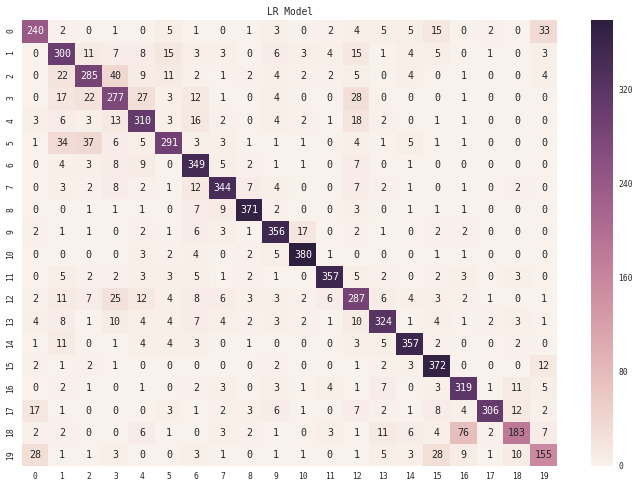

In [13]:
confusion(test['target'], predicted, 'LR Model')

In [14]:
clf = LogisticRegression(penalty='l1')
clf.fit(train_counts, train['target'])

predicted = clf.predict(test_data)
print("LR-1 prediction accuracy = {0:5.1f}%".format(100.0 * clf.score(test_data, test['target'])))



SVM prediction accuracy =  79.8%


In [15]:
clf = LogisticRegression(penalty='l2')
clf.fit(train_counts, train['target'])

predicted = clf.predict(test_data)
print("LR-2 prediction accuracy = {0:5.1f}%".format(100.0 * clf.score(test_data, test['target'])))



SVM prediction accuracy =  81.8%


### TF IFD

use different classifier
TF IFD


In [16]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
train_tfidf = tfidf_transformer.fit_transform(train_counts)
train_tfidf.shape

(11314, 100000)

In [17]:
clf = SGDClassifier().fit(train_tfidf, train['target'])

#clf = MultinomialNB().fit(train_tfidf, train['target'])

test_tfidf_data = tfidf_transformer.transform(test_data)
predicted = clf.predict(test_tfidf_data)

print("SGD TF-IDF prediction accuracy = {0:5.1f}%".format(100.0 * clf.score(test_tfidf_data, test['target'])))

NB TF-IDF prediction accuracy =  85.3%


In [18]:
np.mean(predicted == test['target'])

0.85262878385554963

In [19]:
print(metrics.classification_report(test['target'], predicted,
    target_names = test['target_names']))

                          precision    recall  f1-score   support

             alt.atheism       0.86      0.76      0.81       319
           comp.graphics       0.78      0.77      0.78       389
 comp.os.ms-windows.misc       0.76      0.75      0.76       394
comp.sys.ibm.pc.hardware       0.75      0.72      0.74       392
   comp.sys.mac.hardware       0.82      0.86      0.84       385
          comp.windows.x       0.86      0.77      0.82       395
            misc.forsale       0.81      0.91      0.86       390
               rec.autos       0.93      0.90      0.91       396
         rec.motorcycles       0.95      0.95      0.95       398
      rec.sport.baseball       0.90      0.95      0.92       397
        rec.sport.hockey       0.94      0.98      0.96       399
               sci.crypt       0.91      0.95      0.93       396
         sci.electronics       0.80      0.78      0.79       393
                 sci.med       0.90      0.87      0.89       396
         

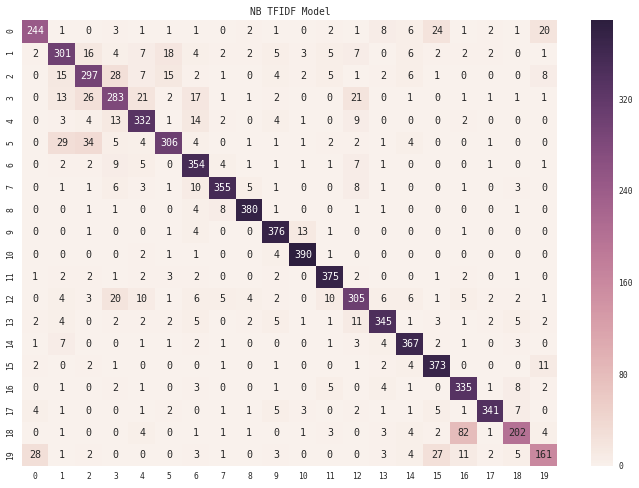

In [20]:
confusion(test['target'], predicted, 'NB TFIDF Model')

### Tweet Data Test

In [21]:
docs_new = [
    '''Are you an Entrepreneur at the University of Illinois in Champaign ? 
    If so, you will want to look at this. See=&gt; https://t.co/TVMxlEdo9d''',
    '''@YoureWelcomeCU highlights tech innovation from #ChampaignUrbana and much more:
    http://t.co/CXIbpNL3UH http://t.co/y3am3swGKU''',
    '''RT @LauraFrerichs: Tim Hassinger, CEO of @DowAgro at grand opening of new Innovation Lab
    @UIResearchPark "it's a special relationship" http…''',
    '''Join us on October 6 for Data Analytics After Hours: #networking event w/local companies
    http://t.co/fJfOa0U3tS http://t.co/23F0sDYhQN'''
]

new_counts = cv.transform(docs_new)

predicted = clf.predict(new_counts)

for doc, category in zip(docs_new, predicted):
    print('{0} \n=> {1}\n'.format(doc, train['target_names'][category]))

Are you an Entrepreneur at the University of Illinois in Champaign ? 
    If so, you will want to look at this. See=&gt; https://t.co/TVMxlEdo9d 
=> rec.autos

@YoureWelcomeCU highlights tech innovation from #ChampaignUrbana and much more:
    http://t.co/CXIbpNL3UH http://t.co/y3am3swGKU 
=> comp.sys.ibm.pc.hardware

RT @LauraFrerichs: Tim Hassinger, CEO of @DowAgro at grand opening of new Innovation Lab
    @UIResearchPark "it's a special relationship" http… 
=> rec.autos

Join us on October 6 for Data Analytics After Hours: #networking event w/local companies
    http://t.co/fJfOa0U3tS http://t.co/23F0sDYhQN 
=> sci.space



### Pipeline


In [22]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('vect', CountVectorizer(stop_words = 'english')),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SGDClassifier(loss='hinge', penalty='l2',
                                           alpha=1e-3, n_iter=5, random_state=23))])

In [23]:
text_clf = text_clf.fit(train['data'], train['target'])

In [24]:
predicted = text_clf.predict(test['data'])

In [25]:
np.mean(predicted == test['target'])  

0.82262347318109397

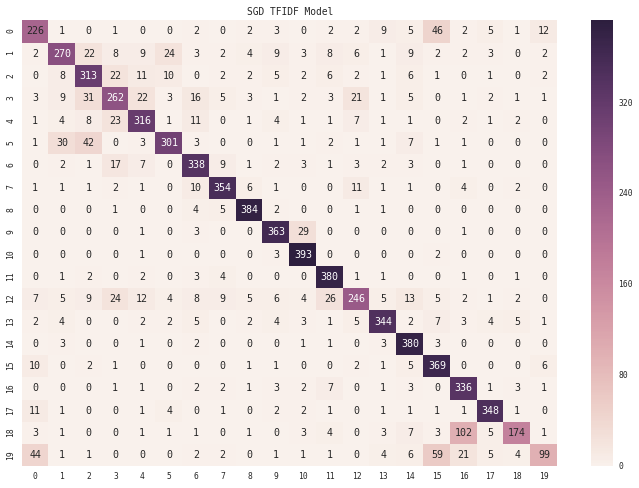

In [26]:
confusion(test['target'], predicted, 'SGD TFIDF Model')

### Tweet Data Test

In [27]:
docs_new = [
    '''Are you an Entrepreneur at the University of Illinois in Champaign ? 
    If so, you will want to look at this. See=&gt; https://t.co/TVMxlEdo9d''',
    '''@YoureWelcomeCU highlights tech innovation from #ChampaignUrbana and much more:
    http://t.co/CXIbpNL3UH http://t.co/y3am3swGKU''',
    '''RT @LauraFrerichs: Tim Hassinger, CEO of @DowAgro at grand opening of new Innovation Lab
    @UIResearchPark "it's a special relationship" http…''',
    '''Join us on October 6 for Data Analytics After Hours: #networking event w/local companies
    http://t.co/fJfOa0U3tS http://t.co/23F0sDYhQN'''
]

#new_counts = text_clf.transform(docs_new)

predicted = text_clf.predict(docs_new)

for doc, category in zip(docs_new, predicted):
    print('{0} \n=> {1}\n'.format(doc, train['target_names'][category]))

Are you an Entrepreneur at the University of Illinois in Champaign ? 
    If so, you will want to look at this. See=&gt; https://t.co/TVMxlEdo9d 
=> rec.autos

@YoureWelcomeCU highlights tech innovation from #ChampaignUrbana and much more:
    http://t.co/CXIbpNL3UH http://t.co/y3am3swGKU 
=> comp.windows.x

RT @LauraFrerichs: Tim Hassinger, CEO of @DowAgro at grand opening of new Innovation Lab
    @UIResearchPark "it's a special relationship" http… 
=> talk.politics.mideast

Join us on October 6 for Data Analytics After Hours: #networking event w/local companies
    http://t.co/fJfOa0U3tS http://t.co/23F0sDYhQN 
=> comp.windows.x



### Clustering Analysis


In [28]:
from sklearn.cluster import KMeans

true_k = 20

km = KMeans(n_clusters=20, init='k-means++', max_iter=100, n_init=1)

#X = vectorizer.fit_transform(dataset.data)

km.fit(test_data)



KMeans(copy_x=True, init='k-means++', max_iter=100, n_clusters=20, n_init=1,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [29]:
labels = test['target']
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(test_data, km.labels_, sample_size=1000))

print()

print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Homogeneity: 0.025
Completeness: 0.129
V-measure: 0.042
Adjusted Rand-Index: 0.005
Silhouette Coefficient: 0.223

Top terms per cluster:
Cluster 0: myers ms ms myers file edu use server think don gopher
Cluster 1: edu writes don article com people just subject like lines
Cluster 2: dos dos dos windows microsoft windows microsoft tcp ms mouse amiga software
Cluster 3: edu graphics pub mail ray 128 send 3d ftp com
Cluster 4: armenian ed armenians turkish university kuwait azerbaijan russian istanbul armenia
Cluster 5: health malaria hiv 1993 1991 number vaccine use 11 medical
Cluster 6: said door started went children armenians didn people don know
Cluster 7: adl bullock gerard information francisco san fbi san francisco anti police
Cluster 8: jpeg image gif file color format images quality version files
Cluster 9: 92 12 12 92 10 hiv 17 10 12 11 aids patients
Cluster 10: president think people know going united said say mr united states
Cluster 11: edu subject lines com organization writ

/usr/local/lib/python3.4/dist-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


### More advanced processing

NLTK
spacy


In [30]:
from IPython.display import HTML
HTML('<iframe src=http://spacy.io/displacy/ width=800 height=600></iframe>')

-----
## Breakout Session

During this breakout, you should work to . Specific problems you can attempt include the
following:

1. Complete the code cells in this Notebook.

2. 

Additional, more advanced problems:

1. .

-----

### Additional References

-----

### Return to the [Week 4 Index](index.ipynb).

-----